In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import statistics as st

In [2]:
bfs = pd.read_csv("C:\\Users\\Beena Pandey\\OneDrive\\Desktop\\Data\\Black Friday Sale Data.csv")

In [3]:
bfs.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
bfs.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,NaN,NaN,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,NaN,NaN,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,NaN,NaN,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,NaN,NaN,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,NaN,NaN,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
bfs.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [7]:
# Counting of types of data type

bfs.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [8]:
# Counting the total rows and columns in the table

bfs.shape

(550068, 12)

### Checking the Data Set

In [9]:
# Let's check if the data has any null values

bfs.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

* Our data has a lot of null values in the 'Product_Category_2' and 'Product_Category_3' column. I don't think it is a good idea to remove all the empty rows from the data as this will lead to loss of a lot of data.

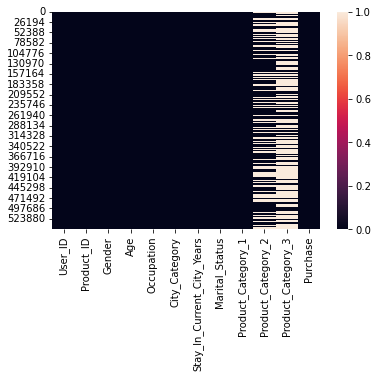

In [10]:
sns.heatmap(bfs.isnull())
plt.show()

In [11]:
# Total of all the null values in the dataset

bfs.isnull().sum().sum()

556885

In [12]:
# Checking for Duplicates

bfs.duplicated().sum()

0

* Column names are very long and bit complicated. So, we will change them.

In [13]:
# Renaming the column names

bfs.rename(columns = {'User_ID':'UserID', 'Product_ID':'ProductID', 'Stay_In_Current_City_Years':'City_Stay', 'Marital_Status':'MaritalStatus', 'Product_Category_1':'Product1', 'Product_Category_2':'Product2', 'Product_Category_3':'Product3'}, inplace = True)

bfs.head(10)

,UserID,ProductID,Gender,Age,Occupation,City_Category,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


###### Droping out unnecessary data

* 'ProductID' column in the 'bfs' dataset seems unnecessary. And removing it from the dataset won't cause us any harm.

In [14]:
bfs.drop(['ProductID'], inplace = True, axis = 'columns')

bfs.head(5)

,UserID,Gender,Age,Occupation,City_Category,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Data Cleaning 

* We'll start clean the data column wise.

_Column: UserID_

In [15]:
bfs['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [16]:
bfs['UserID'].dtype

dtype('int64')

I don't think we need to make any changes to this column.

_Column: Gender_

In [17]:
bfs['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
bfs['Gender'].value_counts()['M']

414259

In [19]:
bfs['Gender'].value_counts()['F']

135809

In [20]:
bfs.head(5)

,UserID,Gender,Age,Occupation,City_Category,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   City_Stay      550068 non-null  object 
 6   MaritalStatus  550068 non-null  int64  
 7   Product1       550068 non-null  int64  
 8   Product2       376430 non-null  float64
 9   Product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


_Column: Age_

In [22]:
bfs['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

The data in this column is in intervals. We will name these intervals as child, adult etc

In [23]:
def Ages(value):
    if '0-17' in value:
        value = value.replace('0-17', 'Child')
        return str(value)
    elif '18-25' in value:
        value = value.replace('18-25', 'Teenage')
        return str(value)
    elif '26-35' in value:
        value = value.replace('26-35', 'Adult')
        return str(value)
    elif '36-45' in value:
        value = value.replace('36-45', 'Adult')
        return str(value)
    elif '46-50' in value:
        value = value.replace('46-50', 'Adult')
        return str(value)
    elif '51-55' in value:
        value = value.replace('51-55', 'Old')
        return str(value)
    else:
        value = value.replace('55+', 'Old')
        return str(value)

bfs['Age'] = bfs['Age'].apply(Ages)

In [24]:
bfs.head(5)

,UserID,Gender,Age,Occupation,City_Category,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase
0,1000001,F,Child,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,Child,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,Child,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,Old,16,C,4+,0,8,NaN,NaN,7969


* Over here we have replaced the age groups according to the categories.
* We have replaced numerical data into categorical data.
* The types of categories are: Child, Adult, Teenage and Old.
    
1. 0-17 -> Child
2. 18-25 -> Teenage
3. 26-35 -> Adult
4. 36-45 -> Adult
5. 46-50 -> Adult
6. 51-55 -> Old
7. 55+ -> Old

_*Column: Occupation*_

In [25]:
bfs['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

_*Column: City_Category*_

In [26]:
bfs['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

_*Column: City*_

In [27]:
bfs['City_Stay'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
def Cities(value):
    if '+' in value:
        value = value.replace('+', '')
        return int(value)
    else:
        return int(value)
    
bfs['City_Stay'] = bfs['City_Stay'].apply(Cities)

In [29]:
bfs['City_Stay'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

_*Column: Marital_Status*_

In [30]:
bfs['MaritalStatus'].unique()

array([0, 1], dtype=int64)

* There's nothing to change in this column.
    1. Here married status -> 1
    2. Whereas single status -> 0

_*Column: Product1*_

In [31]:
bfs['Product1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

_*Column: Product2*_

In [32]:
bfs['Product2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [33]:
bfs['Product2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product2, dtype: int64

* Now, we'll have to deal with these null values.

In [34]:
bfs['Product2'].isnull().sum()

173638

In [35]:
s1 = round(bfs['Product2'].mean())
s1

10

In [36]:
bfs['Product2'].fillna(s1, inplace = True)

In [37]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   City_Stay      550068 non-null  int64  
 6   MaritalStatus  550068 non-null  int64  
 7   Product1       550068 non-null  int64  
 8   Product2       550068 non-null  float64
 9   Product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [38]:
bfs['Product2'] = bfs['Product2'].astype(int)
bfs.dtypes

UserID             int64
Gender            object
Age               object
Occupation         int64
City_Category     object
City_Stay          int64
MaritalStatus      int64
Product1           int64
Product2           int32
Product3         float64
Purchase           int64
dtype: object

_*Column: Product3*_

In [39]:
bfs['Product3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [40]:
bfs['Product3'].isnull().sum()

383247

* Column 'Product3' also has null values.

In [41]:
s2 = round(bfs['Product3'].mean())
s2

13

In [42]:
bfs['Product3'].fillna(s2, inplace = True)

In [43]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   City_Stay      550068 non-null  int64  
 6   MaritalStatus  550068 non-null  int64  
 7   Product1       550068 non-null  int64  
 8   Product2       550068 non-null  int32  
 9   Product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 44.1+ MB


In [44]:
bfs['Product3'] = bfs['Product3'].astype(int)
bfs.dtypes

UserID            int64
Gender           object
Age              object
Occupation        int64
City_Category    object
City_Stay         int64
MaritalStatus     int64
Product1          int64
Product2          int32
Product3          int32
Purchase          int64
dtype: object

In [45]:
bfs.head()

,UserID,Gender,Age,Occupation,City_Category,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase
0,1000001,F,Child,10,A,2,0,3,10,13,8370
1,1000001,F,Child,10,A,2,0,1,6,14,15200
2,1000001,F,Child,10,A,2,0,12,10,13,1422
3,1000001,F,Child,10,A,2,0,12,14,13,1057
4,1000002,M,Old,16,C,4,0,8,10,13,7969


##### We've cleaned the data. Now, we'll again give it a check.

In [46]:
bfs.isnull().sum()

UserID           0
Gender           0
Age              0
Occupation       0
City_Category    0
City_Stay        0
MaritalStatus    0
Product1         0
Product2         0
Product3         0
Purchase         0
dtype: int64

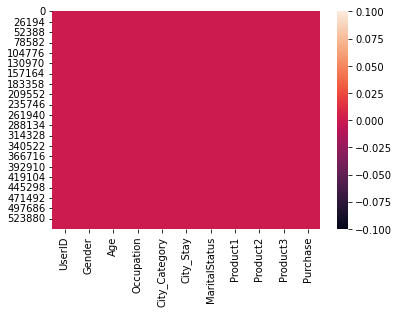

In [47]:
sns.heatmap(bfs.isnull())
plt.show()

The heat map shows that there is no null value present in data set.

* Our data now seems to be clean. So, we'll start will Data Visualization.

=> _Checking the feature of **Purchase** feature -_

* We can use the code written below. But in this code we will not be able to adjust the size of the entire subplot. Hence, we'll prefer the other code.

-> plt.subplot(2,2,1)
-> sns.distplot(bfs['Purchase'], rug = True)
-> plt.title('Distribution')

-> plt.subplot(2,2,2, figsize=(12,8))
-> sns.boxenplot(x=bfs['Purchase'], data=bfs, palette="rocket_r")
-> plt.title('Outliers')

-> plt.subplot(2,2,3, figsize=(12,8))
-> sns.violinplot(x=bfs['Purchase'], alpha=.7, palette="rocket_r", data=bfs)

-> plt.subplot(2,2,4, figsize=(12,8))
-> sns.boxplot(x=bfs['Purchase'], y=bfs['Gender'], data=bfs, palette="rocket_r")


-> plt.tight_layout()
-> plt.show()

* ###### Let's check for the outliers in the data. We will examine the purchase column for this.

##### Detecting Outlier using Z-score

Formula for z-score = (Observation - Mean) / Standard Deviation

In [48]:
# Find the limits

upper_limit = bfs['Purchase'].mean() + 3*bfs['Purchase'].std()
lower_limit = bfs['Purchase'].mean() - 3*bfs['Purchase'].std()

print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: 24333.164894421006
Lower Limit: -5805.227468502755


In [49]:
# Find the Outliers

bfs.loc[(bfs['Purchase'] > upper_limit) | (bfs['Purchase'] < lower_limit)]   # here | is used for 'OR'

,UserID,Gender,Age,Occupation,City_Category,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase


* Z-Score method shows no outliers. Therefore, we'll confirm it using the Inter-Quartile Range Method

##### Detecting Outlier using Inter-Quartile Range (IQR)

In [50]:
Q1 = bfs['Purchase'].quantile(0.25)
Q3 = bfs['Purchase'].quantile(0.75)
IQR = Q3 - Q1

print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)

Q1 :  5823.0
Q3 :  12054.0
IQR :  6231.0


In [51]:
Upper_limit = Q3 + (1.5*IQR)
Lower_limit = Q1 - (1.5*IQR)

print('Upper Limit : ', Upper_limit)
print('Lower Limit : ', Lower_limit)

Upper Limit :  21400.5
Lower Limit :  -3523.5


C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

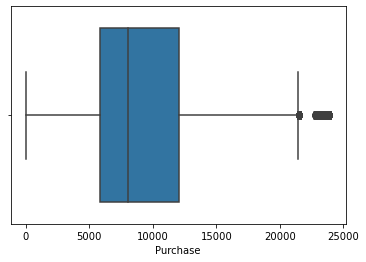

In [52]:
sns.boxplot(bfs['Purchase'])

In [53]:
# Find the Outliers

bfs.loc[(bfs['Purchase'] > Upper_limit) | (bfs['Purchase'] < Lower_limit)]   # here | is used for 'OR'

,UserID,Gender,Age,Occupation,City_Category,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase
343,1000058,M,Adult,2,B,3,0,10,16,13,23603
375,1000062,F,Adult,3,A,1,0,10,13,13,23792
652,1000126,M,Teenage,9,B,1,0,10,14,16,23233
736,1000139,F,Adult,20,C,2,0,10,15,16,23595
1041,1000175,F,Adult,2,B,1,0,10,15,13,23341
...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,M,Adult,20,B,1,0,10,13,16,23753
544704,1005847,F,Teenage,4,B,2,0,10,13,13,23724
544743,1005852,F,Adult,1,A,0,1,10,16,13,23529
545663,1006002,M,Old,0,C,1,1,10,13,16,23663


* This clearly shows that our data has some outliers present in it. Now we have two options in front of us:
    1. Trimming - delete the outlier data
    2. Capping - change the outlier values to upper or lower limit values

* Our dataset is not a gigantic data set. Therefroe, we will not trim our data instead we'll go with capping 

In [54]:
# Capping - change the outlier values to upper or lower limit values

Bfs = bfs.copy()

Bfs.loc[(Bfs['Purchase'] > Upper_limit), 'Purchase'] = Upper_limit
Bfs.loc[(Bfs['Purchase'] < Lower_limit), 'Purchase'] = Lower_limit

* In this code we're changing the values that are greater than the Upper_limit to Upper_limit and similarly values which are less than the Lower_limit are replaced by the Lower_limit value 

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

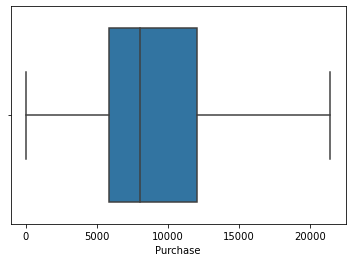

In [55]:
sns.boxplot(Bfs['Purchase'])

* Now, are data is free of any outliers.

In [56]:
Bfs.describe()

,UserID,Occupation,City_Stay,MaritalStatus,Product1,Product2,Product3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9.892101,12.899387,9255.024296
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,4.208490,2.276942,4999.516285
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,8.000000,13.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,10.000000,13.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,14.000000,13.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,21400.500000


In [57]:
# Mean of Purchase for each Gender according to Age

pd.pivot_table(data = Bfs, index = 'Age', values = 'Purchase', columns = ['Gender'], aggfunc = 'mean')

Gender,F,M
Age,,
Adult,8805.594226,9407.757830
Child,8331.026461,9227.157551
Old,9013.334212,9592.524574
Teenage,8339.706026,9434.812493


In [58]:
# Sum of Purchase for each Gender according to Marital Status

pd.pivot_table(data = Bfs, index = 'Gender', values = 'Purchase', columns = ['MaritalStatus'], aggfunc = 'mean')

MaritalStatus,0,1
Gender,,
F,8672.561272,8800.522803
M,9445.012860,9404.068016


In [59]:
# Mean of Purchase for each Gender according to City

pd.pivot_table(data = Bfs, index = 'City_Category', values = 'Purchase', columns = ['Gender'], aggfunc = 'mean')

Gender,F,M
City_Category,,
A,8571.748684,9009.245706
B,8533.189581,9346.166957
C,9120.381136,9903.298803


In [60]:
# Sum of Purchase for each Age according to Marital Status

pd.pivot_table(data = Bfs, index = 'Age', values = 'Purchase', columns = ['MaritalStatus'], aggfunc = 'mean')

MaritalStatus,0,1
Age,,
Adult,9272.994095,9246.647967
Child,8925.539597,NaN
Old,9543.838532,9404.480246
Teenage,9211.257072,8989.115150


In [61]:
# Mean of Purchase for each Gender according to City

pd.pivot_table(data = Bfs, index = 'Age', values = 'Purchase', columns = ['City_Category'], aggfunc = 'mean')

City_Category,A,B,C
Age,,,
Adult,8910.513133,9141.429202,9791.260539
Child,8601.165291,8907.227047,9055.363681
Old,9117.297198,9429.827555,9579.696099
Teenage,8828.847885,9026.061704,9690.792783


In [99]:
# Mean of Purchase on the basis of Gender, Age, City, and Stay in City

pd.pivot_table(data = Bfs, index = ('Age', 'Gender'), values = 'Purchase', columns = ['City_Category', 'City_Stay'], aggfunc = 'mean')

City_Category             A                                           \
City_Stay                 0            1             2             3   
Age     Gender                                                         
Adult   F       8928.956562  8669.450531   8480.478859   8729.622760   
        M       9167.410452  8833.293138   9047.609402   9099.840581   
Child   F       5631.365714  7984.401198   7951.549724   8214.097754   
        M       9702.305732  8753.769634  10518.326291  10041.094203   
Old     F       9147.204420  8407.219494   9122.068122   8791.981527   
        M       8831.406907  9698.179165   8856.176563   9885.327391   
Teenage F       7491.834646  9059.285279   8491.219700   7095.933099   
        M       8864.500248  9018.655443   9453.710912   8972.549029   

City_Category                           B                            \
City_Stay                 4             0            1            2   
Age     Gender                                                        
Adult   F       8704.778140   8591.841377  8621.475364  8630.307600   
        M       8859.911209   9174.758386  9299.972453  9350.676253   
Child   F               NaN   9818.735023  8835.022282  8696.612226   
        M               NaN  10106.606218  9575.832160  8395.221012   
Old     F       8330.102362   8538.679487  9006.894863  9189.647759   
        M       8721.388959   8886.944836  9734.992895  9177.148708   
Teenage F       8275.856239   7672.517878  7869.792283  8184.931947   
        M       8958.103741   8937.823259  9578.887719  9642.015875   

City_Category                                         C               \
City_Stay                  3            4             0            1   
Age     Gender                                                         
Adult   F        8624.457332  8642.953596   8989.235225  9239.628000   
        M        9258.245912  9459.216468   9910.253510  9981.249065   
Child   F       10200.467391  5581.950495   9101.980198  8217.020057   
        M        8836.115732  8024.922249   9217.713734  9481.369850   
Old     F        8805.358002  8319.149718   9317.651222  8988.150500   
        M       10070.046447  9746.228868  10077.007862  9639.302154   
Teenage F        8580.095147  8103.504535   9108.621977  9094.172036   
        M        9580.449383  9096.899831  10267.125000  9515.738238   

City_Category                                            
City_Stay                  2             3            4  
Age     Gender                                           
Adult   F        9164.204042   9016.187485  9344.642013  
        M       10079.969997   9988.421811  9954.284012  
Child   F        7540.480583   8844.476868  9204.871345  
        M        9125.735461   9703.215630  9266.539501  
Old     F        9373.281116   9517.299839  9112.294996  
        M        9693.004234   9729.384009  9722.606599  
Teenage F        9147.061388   9088.724792  8928.303832  
        M       10028.425393  10049.797459  9878.774395

### Data Visualization

* For data visualization we are going to use two python libraries.
    1. Seaborn
    2. Matplotlib

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


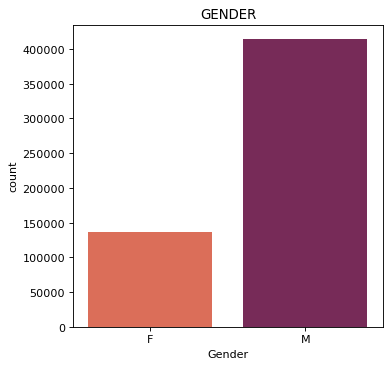

[414259 135809]


In [63]:
# Column : Gender 

plt.figure(figsize = (5,5), dpi = 80)
plt.title('GENDER')
sns.countplot(Bfs['Gender'], palette = 'rocket_r')

plt.show()
print(Bfs['Gender'].value_counts().unique())

* This tells us that there are more males buying different products during the _Black Friday Sale_ than females.
    1. Total Male Count : 4,14,259
    2. Total Female Count : 1,35,809

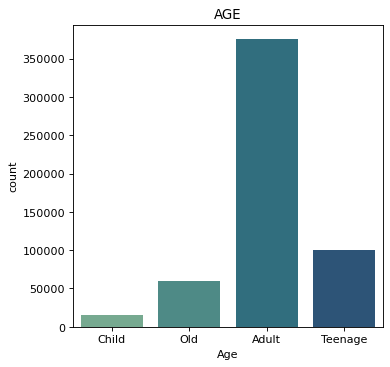

[375301  99660  60005  15102]


In [64]:
# Column : Age

plt.figure(figsize = (5,5), dpi = 80)
plt.title('AGE')
sns.countplot(data = Bfs, x = 'Age', palette = 'crest')

plt.show()
print(Bfs['Age'].value_counts().unique())

* The graph clearly tells us that Adults (26 - 50 years) visit the stores during the _Back Friday Sale_ in huge numbers whereas stores are least visited by the Children (0 - 17 years).

    1. Total Children Visiting the Store : 15,102 
    2. Total Children Visiting the Store : 99,660
    3. Total Children Visiting the Store : 3,75,301 
    4. Total Children Visiting the Store : 60,005

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


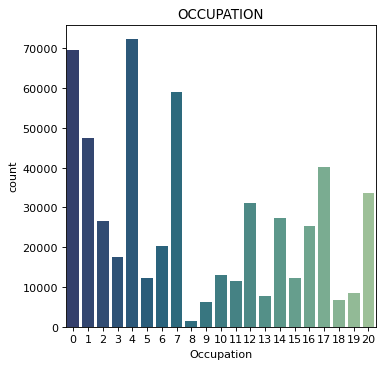

In [65]:
# Column : Occupation

plt.figure(figsize = (5,5), dpi = 80)
plt.title('OCCUPATION')
sns.countplot(Bfs['Occupation'], palette = 'crest_r')

plt.show()

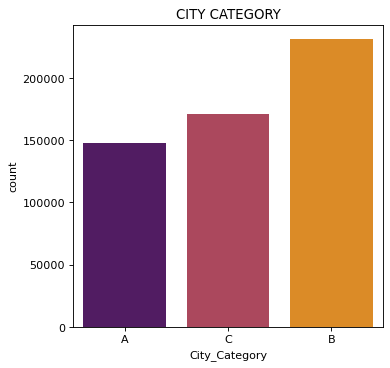

[231173 171175 147720]


In [66]:
# Column : City Category

plt.figure(figsize = (5,5), dpi = 80)
plt.title('CITY CATEGORY')
sns.countplot(data = Bfs, x = 'City_Category', palette = 'inferno')

plt.show()
print(Bfs['City_Category'].value_counts().unique())

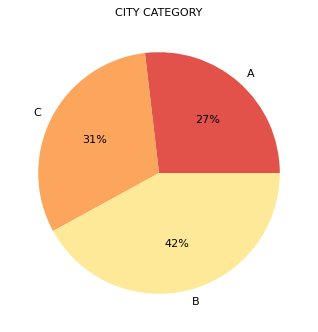

In [67]:
# Column : City Category (Percentage Distribution)

#define data
data = Bfs['City_Category'].value_counts(ascending = True)     # Counting the unique values frequency
labels = Bfs['City_Category'].unique()    # Creating unique value labels

plt.figure(figsize = (5,5), dpi = 80)

plt.title('CITY CATEGORY', size = 10)

#define Seaborn color palette to use
colors = sns.color_palette('Spectral')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

* People visiting the store maximum belong to _City Category B_ while the store is least visited by people belonging to _City Category A_.
    1. Total People of City A : 1,47,720
    2. Total People of City B : 2,31,173
    3. Total People of City C : 1,71,175 

* This shows that City A, City B, and City C has contributed 27%, 42%, and 31% respectively to the total purchase made on Black Friday Sale.

* By this we can also say that maximum stores are located in _City B_ 

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


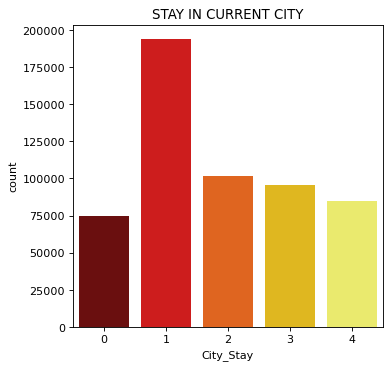

In [68]:
# Column : Stay in Current City

plt.figure(figsize = (5,5), dpi = 80)
plt.title('STAY IN CURRENT CITY')
sns.countplot(Bfs['City_Stay'], palette = 'hot')

plt.show()

* Maximum people visiting the store during the sale have been living in the city for 1 year while they are least visited by people who have newly setteled in the city.

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


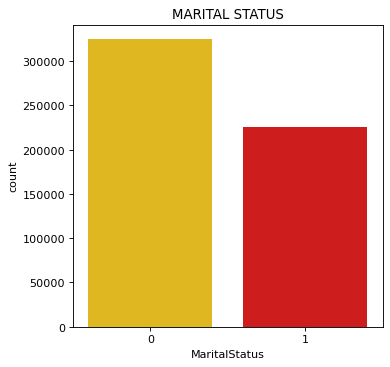

[324731 225337]


In [69]:
# Column : Marital Status

plt.figure(figsize = (5,5), dpi = 80)
plt.title('MARITAL STATUS')
sns.countplot(Bfs['MaritalStatus'], palette = 'hot_r')

plt.show()
print(Bfs['MaritalStatus'].value_counts().unique())

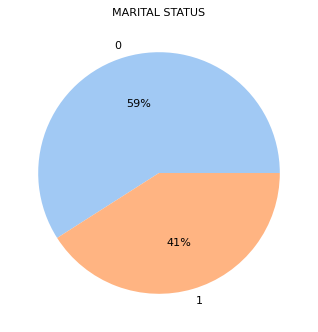

In [70]:
# Column : Marital Status (Percentage Distribution)

#define data
data = Bfs['MaritalStatus'].value_counts()     # Counting the unique values frequency
labels = Bfs['MaritalStatus'].unique()    # Creating unique value labels

plt.figure(figsize = (5,5), dpi = 80)

plt.title('MARITAL STATUS', size = 10)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

* Unmarried people visting the store are in huge number as compared to singles during the _Black Friday Sale_.  

    1. Total Single People : 3,24,731
    2. Total Married People : 2,25,337

* This shows that Unmarried and Married people have contributed 59% and 41% respectively to the total purchase made on Black Friday Sale.

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


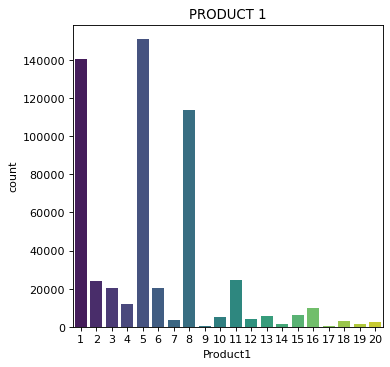

In [71]:
# Column : Product 1

plt.figure(figsize = (5,5), dpi = 80)
plt.title('PRODUCT 1')
sns.countplot(Bfs['Product1'], palette = 'viridis')

plt.show()

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


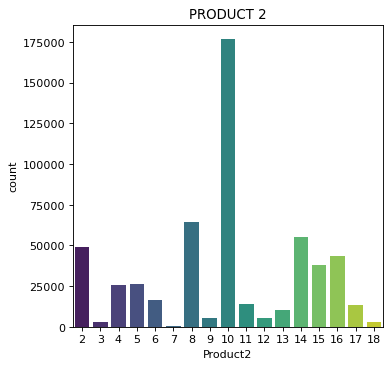

In [72]:
# Column : Product 2

plt.figure(figsize = (5,5), dpi = 80)
plt.title('PRODUCT 2')
sns.countplot(Bfs['Product2'], palette = 'viridis')

plt.show()

C:\Users\Beena Pandey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


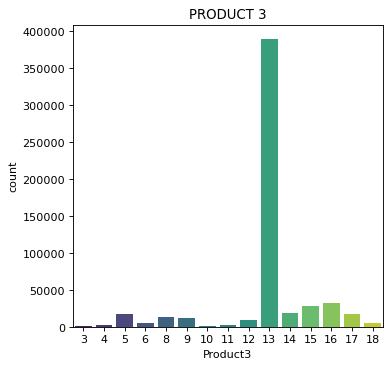

In [73]:
# Column : Product 3

plt.figure(figsize = (5,5), dpi = 80)
plt.title('PRODUCT 3')
sns.countplot(Bfs['Product3'], palette = 'viridis')

plt.show()

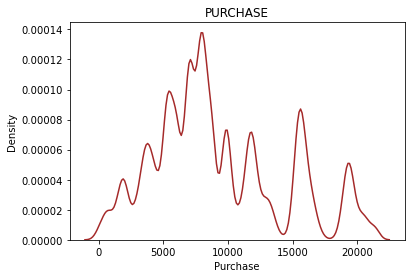

In [74]:
# Column : Pruchase

plt.title('PURCHASE')
sns.kdeplot(Bfs['Purchase'], color = 'brown')

plt.show()

* Purchase rate is highest between the range of 5,000 - 10,000.
* Purchase rate even goes upto range 25,0000.

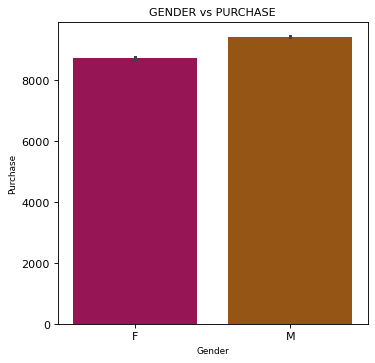

In [75]:
# Gender v/s Purchase

plt.figure(figsize = (5,5), dpi = 80)

plt.title('GENDER vs PURCHASE', size = 10)
sns.barplot(x = 'Gender', y = 'Purchase', data = Bfs, palette = 'brg')
plt.xlabel('Gender', size = 8)
plt.ylabel('Purchase', size = 8)

plt.show()

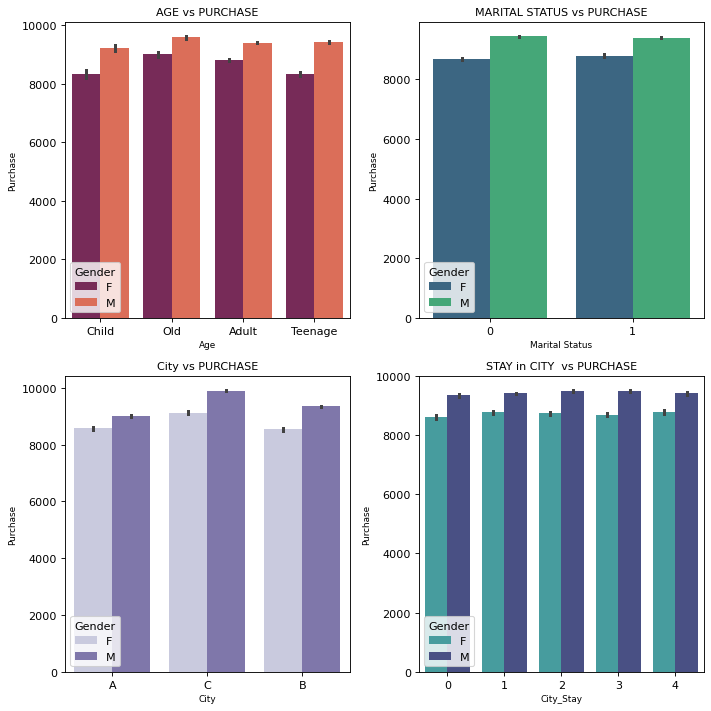

In [76]:
plt.figure(figsize = (9,9), dpi = 80)


plt.subplot(2,2,1)
plt.title('AGE vs PURCHASE', size = 10)
sns.barplot(x = 'Age', y = 'Purchase', data = Bfs, palette = 'rocket', hue= 'Gender')
plt.xlabel('Age', size = 8)
plt.ylabel('Purchase', size = 8)

plt.subplot(2,2,2)
plt.title('MARITAL STATUS vs PURCHASE', size = 10)
sns.barplot(x ='MaritalStatus', y = 'Purchase', data = Bfs, palette = 'viridis', hue = 'Gender')
plt.xlabel('Marital Status', size = 8)
plt.ylabel('Purchase', size = 8)

plt.subplot(2,2,3)
plt.title('City vs PURCHASE', size = 10)
sns.barplot(x = 'City_Category', y = 'Purchase', data = Bfs, palette='Purples', hue='Gender')
plt.xlabel('City', size = 8)
plt.ylabel('Purchase', size = 8)

plt.subplot(2,2,4)
plt.title('STAY in CITY  vs PURCHASE', size = 10)
sns.barplot(x = 'City_Stay', y = 'Purchase', data = Bfs, palette = 'mako_r', hue = 'Gender')
plt.xlabel('City_Stay', size = 8)
plt.ylabel('Purchase', size = 8)


plt.tight_layout()
plt.show()

* From these graphs it is evident that the Purchasing Rate is high among the male population.

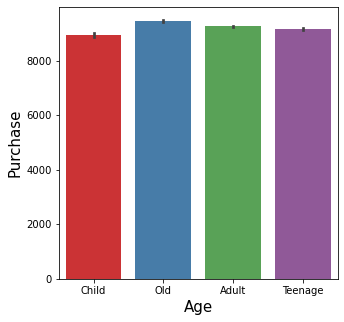

In [77]:
# Age vs purshase

plt.figure(figsize = (5,5))
plt.title
sns.barplot(x = 'Age', y = 'Purchase', data = Bfs, palette = 'Set1')
plt.xlabel('Age', size = 15)
plt.ylabel('Purchase', size = 15)
plt.show()

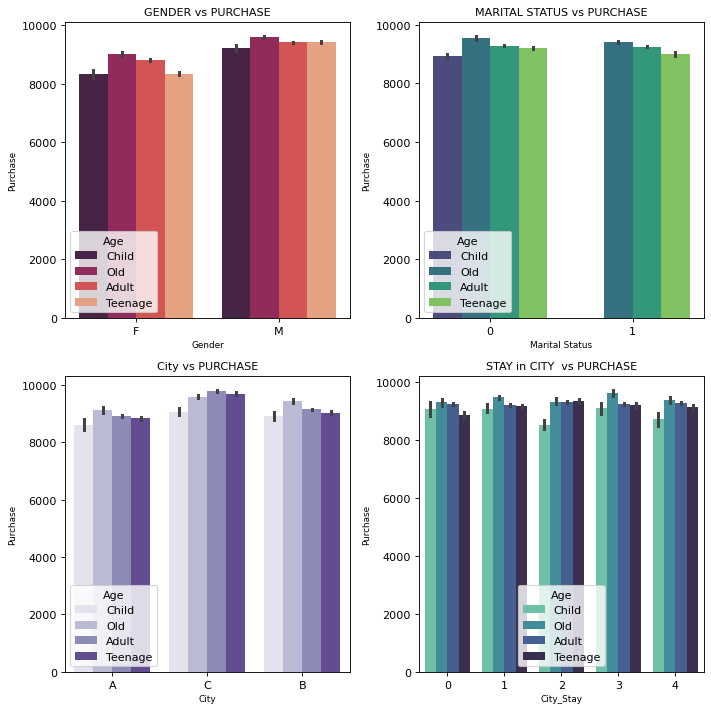

In [78]:
plt.figure(figsize = (9,9), dpi = 80)


plt.subplot(2,2,1)
plt.title('GENDER vs PURCHASE', size = 10)
sns.barplot(x = 'Gender', y = 'Purchase', data = Bfs, palette = 'rocket', hue= 'Age')
plt.xlabel('Gender', size = 8)
plt.ylabel('Purchase', size = 8)

plt.subplot(2,2,2)
plt.title('MARITAL STATUS vs PURCHASE', size = 10)
sns.barplot(x ='MaritalStatus', y = 'Purchase', data = Bfs, palette = 'viridis', hue = 'Age')
plt.xlabel('Marital Status', size = 8)
plt.ylabel('Purchase', size = 8)

plt.subplot(2,2,3)
plt.title('City vs PURCHASE', size = 10)
sns.barplot(x = 'City_Category', y = 'Purchase', data = Bfs, palette='Purples', hue='Age')
plt.xlabel('City', size = 8)
plt.ylabel('Purchase', size = 8)

plt.subplot(2,2,4)
plt.title('STAY in CITY  vs PURCHASE', size = 10)
sns.barplot(x = 'City_Stay', y = 'Purchase', data = Bfs, palette = 'mako_r', hue = 'Age')
plt.xlabel('City_Stay', size = 8)
plt.ylabel('Purchase', size = 8)


plt.tight_layout()
plt.show()

* This means that the purchase rate is the highest among the Old age people i.e. people belonging to the age group of 51 and onwards. 
* And is least among the Childern i.e. people belonging to the age group of new born to 17 years.

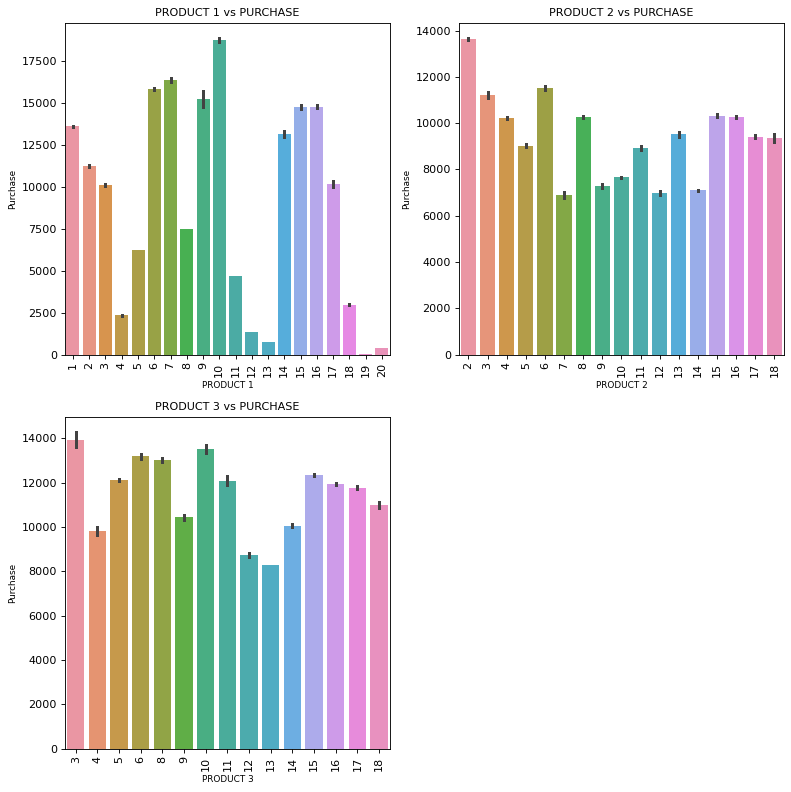

In [79]:
# Plotting various Products vs Purchase

plt.figure(figsize = (10,10), dpi = 80)

plt.subplot(2,2,1)
plt.title('PRODUCT 1 vs PURCHASE', size = 10)
sns.barplot(x = 'Product1', y = 'Purchase', data = Bfs)
plt.xlabel('PRODUCT 1', size = 8)
plt.ylabel('Purchase', size = 8)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('PRODUCT 2 vs PURCHASE', size = 10)
sns.barplot(x = 'Product2', y = 'Purchase', data = Bfs)
plt.xlabel('PRODUCT 2', size = 8)
plt.ylabel('Purchase', size = 8)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('PRODUCT 3 vs PURCHASE', size = 10)
sns.barplot(x = 'Product3', y = 'Purchase', data = Bfs)
plt.xlabel('PRODUCT 3', size = 8)
plt.ylabel('Purchase', size = 8)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

* In Product 1 and Product 2 graph it can be seen that their 10th product is purchased the most while 3rd product of Product 3 is more purchesd in comparission to other products of Product 3  

* It can also be seen from these graphs that the 10th Product of Product 1 has been the most purchased product in comparsion to all the 3 Product i.e. Product 1, Product 2, and Product 3. 

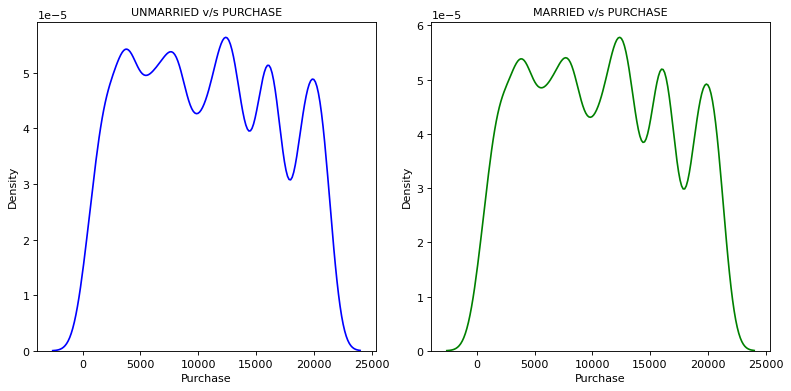

In [80]:
# Purchasing Distribution according to Marital Status

plt.figure(figsize=(10,5),dpi = 80)

plt.subplot(1,2,1)
um = Bfs[bfs['MaritalStatus'] == 0].value_counts('Purchase')
plt.title('UNMARRIED v/s PURCHASE', size = 10)
sns.kdeplot('Purchase', data = um, color = 'b')

plt.subplot(1,2,2)
m = Bfs[Bfs['MaritalStatus'] == 1].value_counts('Purchase')
plt.title('MARRIED v/s PURCHASE', size = 10)
sns.kdeplot('Purchase', data = m, color = 'g')


plt.tight_layout()
plt.show()

* Purchase distribution of both 'Married' and 'UnMarried' customers is more or less the same.

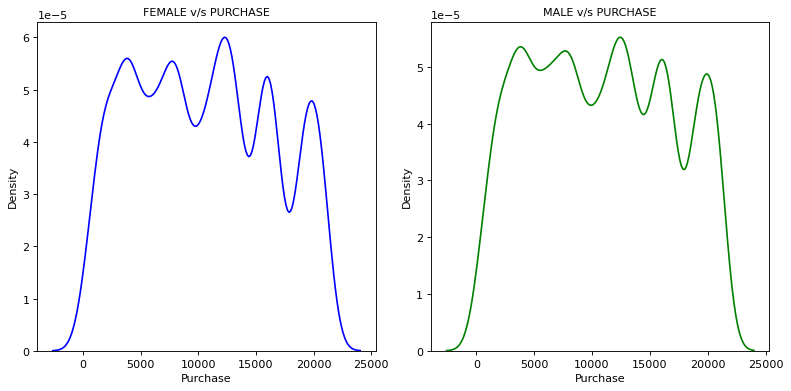

In [81]:
# Purchasing Distribution according to Gender

plt.figure(figsize=(10,5),dpi=80)

plt.subplot(1,2,1)
f = Bfs[Bfs['Gender'] == 'F'].value_counts('Purchase')
plt.title('FEMALE v/s PURCHASE', size = 10)
sns.kdeplot('Purchase', data = f, color = 'b')

plt.subplot(1,2,2)
ma = Bfs[Bfs['Gender']=='M'].value_counts('Purchase')
plt.title('MALE v/s PURCHASE', size = 10)
sns.kdeplot('Purchase',data = ma, color = 'g')


plt.tight_layout()
plt.show()

* Purchase distribution of both 'Male' and 'Female' customers is more or less the same.

<Figure size 500x500 with 0 Axes>

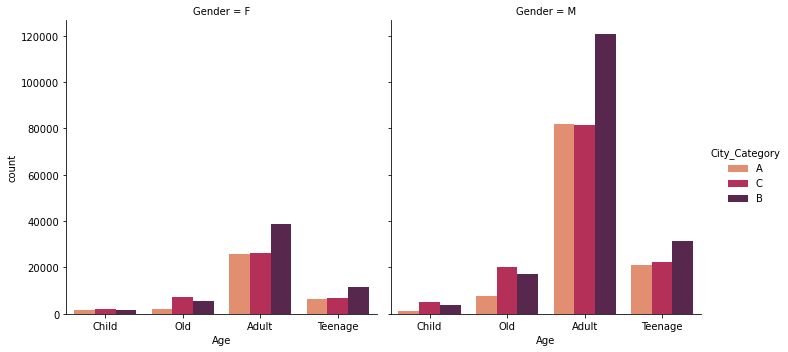

In [82]:
plt.figure(figsize = (5,5), dpi = 100)

sns.catplot(data = Bfs, x = 'Age', col = 'Gender', hue = 'City_Category', palette = 'rocket_r', kind = 'count')
plt.show()

###### Q. Out of the three product categories which is the most consumed product category in each city?

##### Ans. 

In [83]:
# Grouping the dataset on the basis of the cities

Bfs_group = Bfs.groupby('City_Category')
print(Bfs_group.groups)

{'A': [0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 56, 57, 58, 59, 60, 61, 62, 63, 64, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 124, 125, 126, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 234, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 297, 298, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, ...], 'B': [6, 7, 8, 18, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 97, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, ...], 'C': [4, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 47, 48, 49

In [84]:
# Getting group keys from the dataset

bg = Bfs_group.groups.keys()
bg

dict_keys(['A', 'B', 'C'])

In [85]:
for i in bg:
    print('\n - City {} :'.format(i), '\n')
    print(Bfs_group.get_group(i)[['Product1', 'Product2', 'Product3']].sum().sort_values(ascending = True))
    print('.'*25)
    print('')


 - City A : 

Product1     813387
Product2    1471578
Product3    1907037
dtype: int64
.........................


 - City B : 

Product1    1242828
Product2    2284299
Product3    2982602
dtype: int64
.........................


 - City C : 

Product1     916501
Product2    1685451
Product3    2205901
dtype: int64
.........................



* Product 3 is the most consumed product in all the three cities where as Product 1 is the least consumed one.

### Observation :-

1. Males had shown up at stores in large numbers during the sale.
    * There is an interesing finding in this analysis. There is a humongus gap between the number of men and women visiting different stores during the Black Friday Sale and making purchases. However, this gap significantly reduces when we look at the amount of purchases made by both the genders.
    * This tells perhaps women spent money on products with high MRP. Or another possibility could be that they bought large quatities of the product.

2. During the sale adults between the age group of 26 to 50 years visited the stores and made purchases in large numbers.
    * However, the purchasing power can be seen high among the people of older generation (51 to 55+ years of age). This means that older people spent more money than any other generations. 
    * While it is least among the children (0 to 17 years). 

3. In City B maximum people made purchases.

4. Unmarried People did maximum purchasing

5. People made maximum purchases in between the range of 5,000 to 10,000.

6. In Product 1 and Product 2 graph it can be seen that their 10th product is purchased the most while 3rd product of Product 3 is more purchesd in comparission to other products of Product 3 

7. It can also be seen from these graphs that the 10th Product of Product 1 has been the most purchased product in comparsion to all the 3 Product i.e. Product 1, Product 2, and Product 3.  

8. Male children who have been living in City A for two years have the maximum pruchase mean. While Female and Male children who have been living in the City A for four or more years have the minimum purchase mean. 

### Result :-

The data set given to us was dirty.

To clean the Pandas and Numpy was used. Null values were treated. Outlier were checked and were appropriately adjusted using capping. After cleaning we used Seaborn and Matplotlib libraries for data visualization to draw important obvervations.